In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#대한민국 주민등록 인구 데이터를 활용한 인구구조 현황 분석및 시각화

## 1.데이터 준비

### 패키지 설치

In [ ]:
#한글이 안 깨짐
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.4 MB/s eta 0:00:00


### 패키치 임포트

In [ ]:
import numpy as np
import pandas as pd


import folium
import plotly.express as px
import plotly.graph_objects as go

### 데이터 불러오기

In [ ]:
path='/content/drive/MyDrive/abc부트캠프/visual/1인구구조/201512_202412_주민등록인구및세대현황_연간_전국.csv'
df=pd.read_csv(path,encoding='cp949')
df.head()

,행정구역,2015년_총인구수,2015년_세대수,2015년_남자 인구수,2015년_여자 인구수,2016년_총인구수,2016년_세대수,2016년_남자 인구수,2016년_여자 인구수,2017년_총인구수,...,2022년_남자 인구수,2022년_여자 인구수,2023년_총인구수,2023년_세대수,2023년_남자 인구수,2023년_여자 인구수,2024년_총인구수,2024년_세대수,2024년_남자 인구수,2024년_여자 인구수
0,전국 (1000000000),"51,529,338","21,011,152","25,758,186","25,771,152","51,696,216","21,294,009","25,827,594","25,868,622","51,778,544",...,"25,636,951","25,802,087","51,325,329","23,914,851","25,565,736","25,759,593","51,217,221","24,118,928","25,498,324","25,718,897"
1,서울특별시 (1100000000),"10,022,181","4,189,948","4,930,943","5,091,238","9,930,616","4,189,839","4,876,789","5,053,827","9,857,426",...,"4,570,048","4,858,324","9,386,034","4,469,417","4,540,031","4,846,003","9,331,828","4,482,063","4,505,355","4,826,473"
2,부산광역시 (2600000000),"3,513,777","1,437,818","1,735,570","1,778,207","3,498,529","1,451,270","1,725,607","1,772,922","3,470,653",...,"1,619,915","1,697,897","3,293,362","1,564,588","1,605,431","1,687,931","3,266,598","1,570,403","1,589,912","1,676,686"
3,대구광역시 (2700000000),"2,487,829","982,360","1,237,291","1,250,538","2,484,557","994,220","1,234,169","1,250,388","2,475,231",...,"1,162,865","1,200,826","2,374,960","1,094,148","1,166,803","1,208,157","2,363,629","1,104,130","1,159,601","1,204,028"
4,인천광역시 (2800000000),"2,925,815","1,154,004","1,469,869","1,455,946","2,943,069","1,171,399","1,477,671","1,465,398","2,948,542",...,"1,485,175","1,482,139","2,997,410","1,350,912","1,499,016","1,498,394","3,021,010","1,373,827","1,509,243","1,511,767"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   행정구역          20 non-null     object
 1   2015년_총인구수    20 non-null     object
 2   2015년_세대수     20 non-null     object
 3   2015년_남자 인구수  20 non-null     object
 4   2015년_여자 인구수  20 non-null     object
 5   2016년_총인구수    18 non-null     object
 6   2016년_세대수     18 non-null     object
 7   2016년_남자 인구수  18 non-null     object
 8   2016년_여자 인구수  18 non-null     object
 9   2017년_총인구수    18 non-null     object
 10  2017년_세대수     18 non-null     object
 11  2017년_남자 인구수  18 non-null     object
 12  2017년_여자 인구수  18 non-null     object
 13  2018년_총인구수    18 non-null     object
 14  2018년_세대수     18 non-null     object
 15  2018년_남자 인구수  18 non-null     object
 16  2018년_여자 인구수  18 non-null     object
 17  2019년_총인구수    18 non-null     object
 18  2019년_세대수     18 non-null     object
 19  2019년_남자 인

## 2.행정구역과 총인구수 데이터 분석을 위한 전처리

### 필요한 컬럼명 리스트 만들어서 정보 추출

In [ ]:
# "list comprehension"
#

In [ ]:
col_list=[x for  x in df.columns if "총인구수" in x]   #컬럼명에 총인구수가 들어간 컬럼을 뽑아 리스트로
col_list.insert(0, '행정구역') #행정구역을 0번째로 지정
col_list

['행정구역',
 '2015년_총인구수',
 '2016년_총인구수',
 '2017년_총인구수',
 '2018년_총인구수',
 '2019년_총인구수',
 '2020년_총인구수',
 '2021년_총인구수',
 '2022년_총인구수',
 '2023년_총인구수',
 '2024년_총인구수']

데이터프레임 loc() 메소드를 사용하여 정보추출

In [ ]:
#loc[row ,컬럼명]
population_df=df.loc[:,col_list]
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역        20 non-null     object
 1   2015년_총인구수  20 non-null     object
 2   2016년_총인구수  18 non-null     object
 3   2017년_총인구수  18 non-null     object
 4   2018년_총인구수  18 non-null     object
 5   2019년_총인구수  18 non-null     object
 6   2020년_총인구수  18 non-null     object
 7   2021년_총인구수  18 non-null     object
 8   2022년_총인구수  18 non-null     object
 9   2023년_총인구수  18 non-null     object
 10  2024년_총인구수  18 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


In [ ]:
population_df['행정구역']=population_df['행정구역'].str.split('(').str.get(0).str.strip()
#strip(): (앞에 공백 제거
#get(n): n번째 문자 추출 , (앞부분 추출
#split: (기준으로 잘라낸다

### 행정구역을 기준으로 행과 열 바꾸기

In [ ]:
population_df=population_df.set_index('행정구역').T


In [ ]:
population_df.columns

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전북특별자치도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype='object', name='행정구역')

In [ ]:
population_df.head()

행정구역,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,강원특별자치도,충청북도,충청남도,전라북도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
2015년_총인구수,"51,529,338","10,022,181","3,513,777","2,487,829","2,925,815","1,472,199","1,518,775","1,173,534","210,884","12,522,606","1,549,507",0,"1,583,952","2,077,649","1,869,711",0,"1,908,996","2,702,826","3,364,702","624,395"
2016년_총인구수,"51,696,216","9,930,616","3,498,529","2,484,557","2,943,069","1,469,214","1,514,370","1,172,304","243,048","12,716,780","1,550,806",NaN,"1,591,625","2,096,727","1,864,791",NaN,"1,903,914","2,700,398","3,373,871","641,597"
2017년_총인구수,"51,778,544","9,857,426","3,470,653","2,475,231","2,948,542","1,463,770","1,502,227","1,165,132","280,100","12,873,895","1,550,142",NaN,"1,594,432","2,116,770","1,854,607",NaN,"1,896,424","2,691,706","3,380,404","657,083"
2018년_총인구수,"51,826,059","9,765,623","3,441,453","2,461,769","2,954,642","1,459,336","1,489,936","1,155,623","314,126","13,077,153","1,543,052",NaN,"1,599,252","2,126,282","1,836,832",NaN,"1,882,970","2,676,831","3,373,988","667,191"
2019년_총인구수,"51,849,861","9,729,107","3,413,841","2,438,031","2,957,026","1,456,468","1,474,870","1,148,019","340,575","13,239,666","1,541,502",NaN,"1,600,007","2,123,709","1,818,917",NaN,"1,868,745","2,665,836","3,362,553","670,989"


### '전국' 컬럼 삭제

In [ ]:
del population_df['전국']
population_df.columns

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전북특별자치도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype='object', name='행정구역')

In [ ]:
population_df.dtypes

,0
행정구역,
서울특별시,object
부산광역시,object
대구광역시,object
인천광역시,object
광주광역시,object
대전광역시,object
울산광역시,object
세종특별자치시,object
경기도,object


### 총인구수 데이터 특수기호(,) 삭제

In [ ]:
#특수 기호 모두 제거하는 방법 replace() 사용
#population_df.replace(',','',inplace=True)
#특수 기호를 모두 제거하는 정규식을 활용
population_df
population_df.replace('[^\w]','',regex=True,inplace=True)

In [ ]:
population_df.isna().sum()

,0
행정구역,
서울특별시,0
부산광역시,0
대구광역시,0
인천광역시,0
광주광역시,0
대전광역시,0
울산광역시,0
세종특별자치시,0
경기도,0


### 강원특별자치도와 강원도 병합

In [ ]:
display(population_df['강원도'],population_df['강원특별자치도'])

,강원도
2015년_총인구수,1549507
2016년_총인구수,1550806
2017년_총인구수,1550142
2018년_총인구수,1543052
2019년_총인구수,1541502
2020년_총인구수,1542840
2021년_총인구수,1538492
2022년_총인구수,1536498
2023년_총인구수,NaN
2024년_총인구수,NaN


,강원특별자치도
2015년_총인구수,0
2016년_총인구수,NaN
2017년_총인구수,NaN
2018년_총인구수,NaN
2019년_총인구수,NaN
2020년_총인구수,NaN
2021년_총인구수,NaN
2022년_총인구수,NaN
2023년_총인구수,1527807
2024년_총인구수,1517766


In [ ]:
display(population_df['전북특별자치도'],population_df['전라북도'])

,전북특별자치도
2015년_총인구수,0
2016년_총인구수,NaN
2017년_총인구수,NaN
2018년_총인구수,NaN
2019년_총인구수,NaN
2020년_총인구수,NaN
2021년_총인구수,NaN
2022년_총인구수,NaN
2023년_총인구수,NaN
2024년_총인구수,1738690


,전라북도
2015년_총인구수,1869711
2016년_총인구수,1864791
2017년_총인구수,1854607
2018년_총인구수,1836832
2019년_총인구수,1818917
2020년_총인구수,1804104
2021년_총인구수,1786855
2022년_총인구수,1769607
2023년_총인구수,1754757
2024년_총인구수,NaN


In [ ]:
# null 데이터 처리 후 병합
population_df['강원특별자치도']=population_df['강원특별자치도'].astype(float).fillna(0) + population_df['강원도'].astype(float).fillna(0)
population_df['강원특별자치도']

,강원특별자치도
2015년_총인구수,1549507.0
2016년_총인구수,1550806.0
2017년_총인구수,1550142.0
2018년_총인구수,1543052.0
2019년_총인구수,1541502.0
2020년_총인구수,1542840.0
2021년_총인구수,1538492.0
2022년_총인구수,1536498.0
2023년_총인구수,1527807.0
2024년_총인구수,1517766.0


In [ ]:
population_df['전북특별자치도']=population_df['전라북도'].astype(float).fillna(0) + population_df['전북특별자치도'].astype(float).fillna(0)

In [ ]:
population_df['전북특별자치도']

,전북특별자치도
2015년_총인구수,1869711.0
2016년_총인구수,1864791.0
2017년_총인구수,1854607.0
2018년_총인구수,1836832.0
2019년_총인구수,1818917.0
2020년_총인구수,1804104.0
2021년_총인구수,1786855.0
2022년_총인구수,1769607.0
2023년_총인구수,1754757.0
2024년_총인구수,1738690.0


In [ ]:
population_df.drop(['강원도','전라북도'],inplace=True, axis=1)
population_df.columns

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'],
      dtype='object', name='행정구역')

In [ ]:
population_df=population_df.astype(int)

In [ ]:
#파일 저장 -> index 기준(칼럼)
population_df.to_csv('지역별_205_2024년 연간 총인구수 데이터.csv',encoding='utf-8-sig',index_label=['연도'])

## 3.전처리된 데이터 불러오기


In [ ]:
population_df=pd.read_csv('지역별_205_2024년 연간 총인구수 데이터.csv',encoding='utf-8-sig')

## 4.2015~2024 인구구조 변화 시각화

###2015~2024 총 인구수 변화 시각화

In [ ]:
population_df

,연도,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
0,2015년_총인구수,10022181,3513777,2487829,2925815,1472199,1518775,1173534,210884,12522606,1549507,1583952,2077649,1869711,1908996,2702826,3364702,624395
1,2016년_총인구수,9930616,3498529,2484557,2943069,1469214,1514370,1172304,243048,12716780,1550806,1591625,2096727,1864791,1903914,2700398,3373871,641597
2,2017년_총인구수,9857426,3470653,2475231,2948542,1463770,1502227,1165132,280100,12873895,1550142,1594432,2116770,1854607,1896424,2691706,3380404,657083
3,2018년_총인구수,9765623,3441453,2461769,2954642,1459336,1489936,1155623,314126,13077153,1543052,1599252,2126282,1836832,1882970,2676831,3373988,667191
4,2019년_총인구수,9729107,3413841,2438031,2957026,1456468,1474870,1148019,340575,13239666,1541502,1600007,2123709,1818917,1868745,2665836,3362553,670989
5,2020년_총인구수,9668465,3391946,2418346,2942828,1450062,1463882,1136017,355831,13427014,1542840,1600837,2121029,1804104,1851549,2639422,3340216,674635
6,2021년_총인구수,9509458,3350380,2385412,2948375,1441611,1452251,1121592,371895,13565450,1538492,1597427,2119257,1786855,1832803,2626609,3314183,676759
7,2022년_총인구수,9428372,3317812,2363691,2967314,1431050,1446072,1110663,383591,13589432,1536498,1595058,2123037,1769607,1817697,2600492,3280493,678159
8,2023년_총인구수,9386034,3293362,2374960,2997410,1419237,1442216,1103661,386525,13630821,1527807,1593469,2130119,1754757,1804217,2554324,3251158,675252
9,2024년_총인구수,9331828,3266598,2363629,3021010,1408422,1439157,1098049,390685,13694685,1517766,1591177,2136574,1738690,1788819,2531384,3228380,670368


In [ ]:
#빈공간 생성
fig = go.Figure()

#17개 시군구 연도별 총 인구수를 차트 시각화
for 지역 in population_df.columns[1:]:
    fig.add_trace(
        go.Scatter(                                      #go.Sacatter() 차트 사용
            x=population_df[population_df.columns[0]],   #x축 연도 설정
            y=population_df[지역],                        #y값 컬럼값
            name=지역                                     #범례 이름
            )
    )
fig.update_layout(title='제목')   #그래프 꾸미기-제목설정


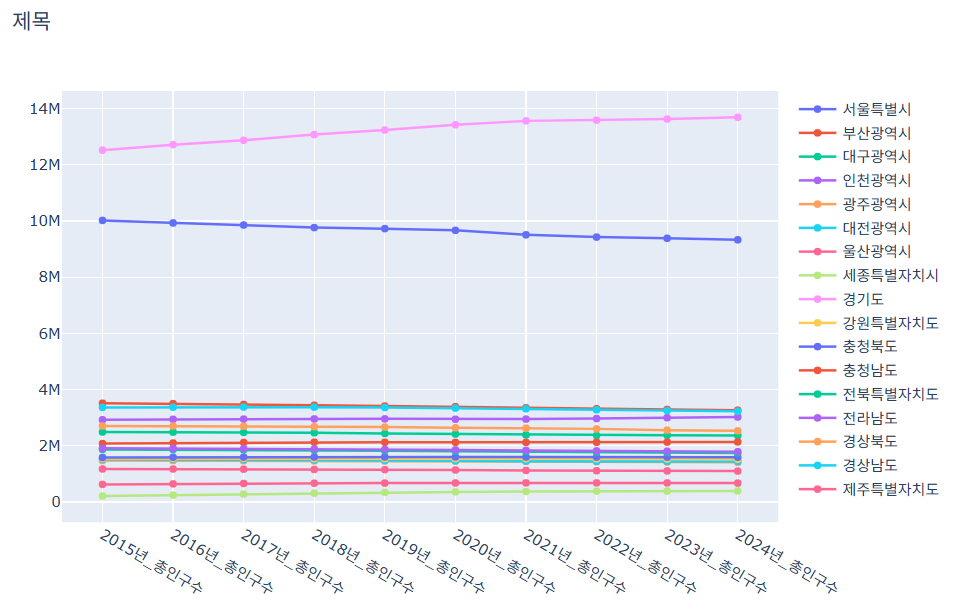

### 서울 인구변화수

In [ ]:
fig=px.scatter(population_df,
               x='연도',
               y='서울특별시' ,
               text='서울특별시',
               title='제목 옵션')
fig.show()

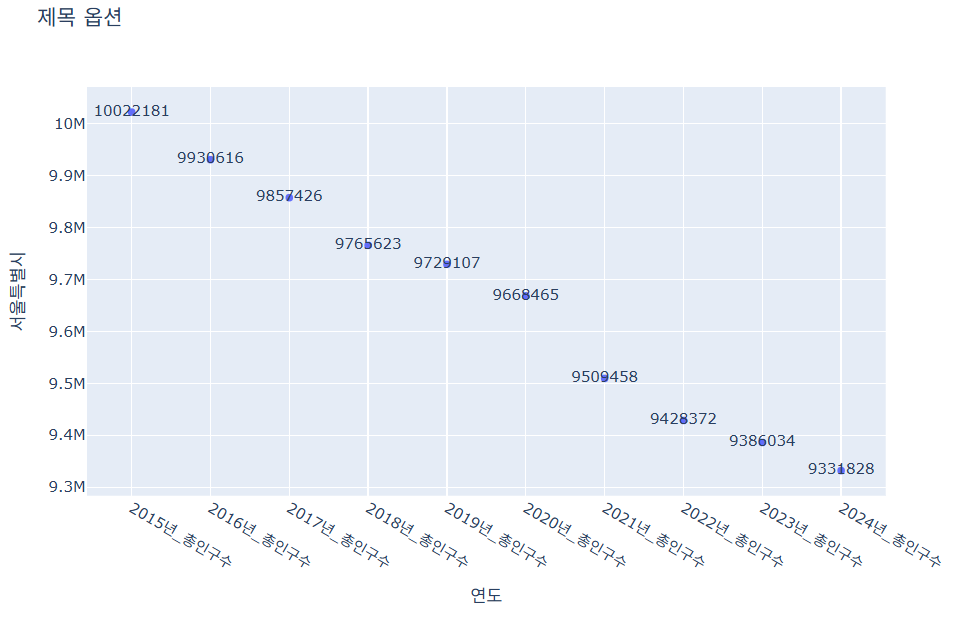

In [ ]:
fig=px.scatter(population_df,
               x='연도',
               y='대전광역시' ,
               text='대전광역시',
               title='대전')
fig.show()

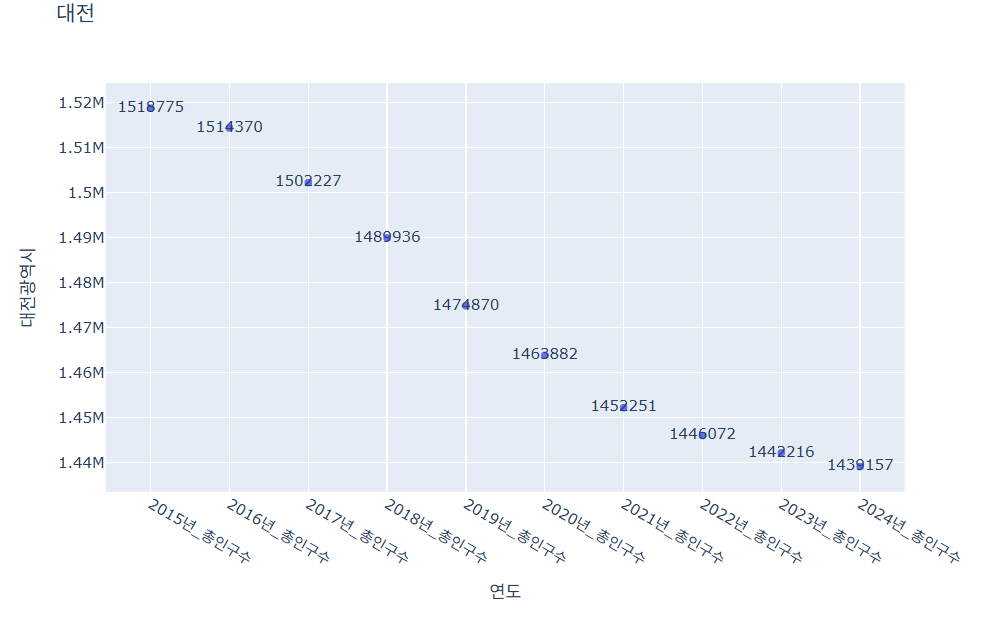

In [ ]:
fig=px.scatter(population_df,
               x='연도',
               y='세종특별자치시' ,
               text='세종특별자치시',
               title='대전에서 세종으로 이동했는지 확인')
fig.show()

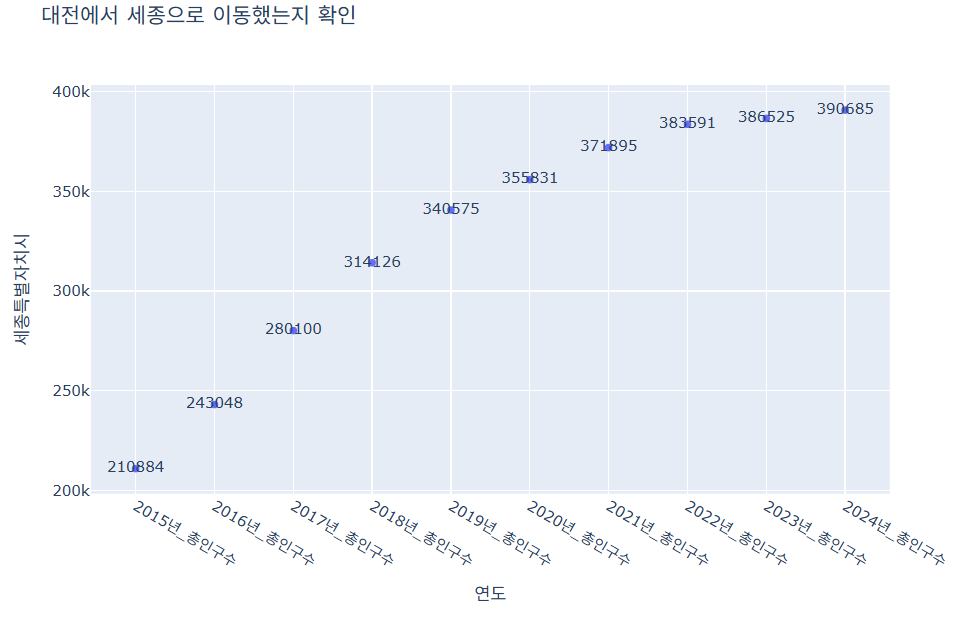

## 5.팀별 지역인구조 분석 : 세종


* 행정관 이슈
* 건물?
* 나이?
* 성별?

In [ ]:
for 지역 in population_df.columns[1:]:
#빈공간 생성
    fig = go.Figure()

#17개 시군구 연도별 총 인구수를 차트 시각화

    fig.add_trace(
        go.Scatter(                                      #go.Sacatter() 차트 사용
            x=population_df[population_df.columns[0]],   #x축 연도 설정
            y=population_df[지역],                        #y값 컬럼값
            name=지역                                     #범례 이름
            )
    )
    fig.update_layout(title=지역)   #그래프 꾸미기-제목설정
    fig.show()

In [ ]:
population_df.columns[8:9]

Index(['세종특별자치시'], dtype='object')

In [ ]:
for 지역 in population_df.columns[8:9]:
#빈공간 생성
    fig = go.Figure()

#17개 시군구 연도별 총 인구수를 차트 시각화

    fig.add_trace(
        go.Scatter(                                      #go.Sacatter() 차트 사용
            x=population_df[population_df.columns[0]],   #x축 연도 설정
            y=population_df[지역],                        #y값 컬럼값
            name=지역                                     #범례 이름
            )
    )
    fig.update_layout(title=지역)   #그래프 꾸미기-제목설정
    fig.show()

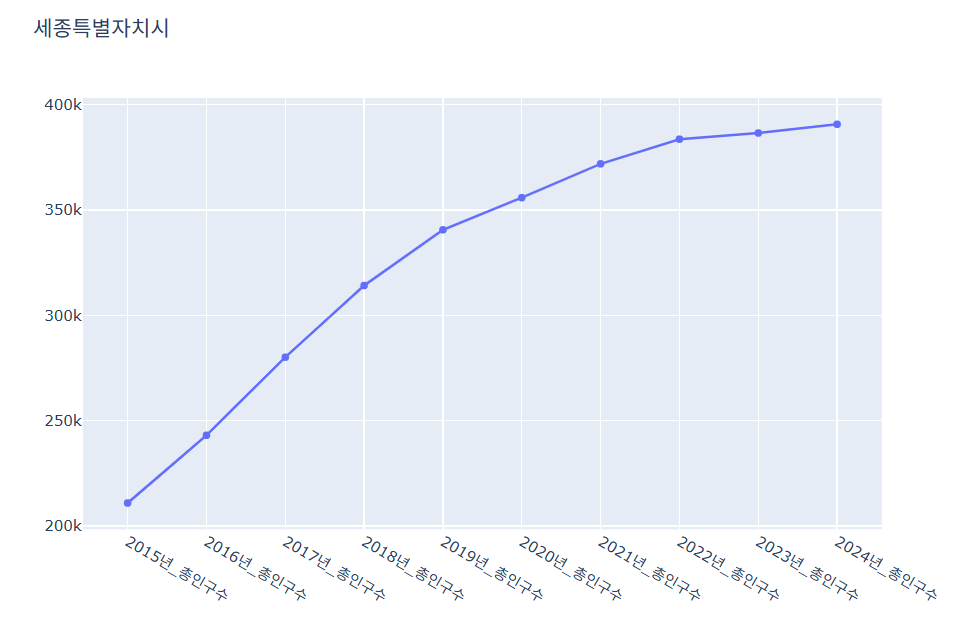